In [8]:
import pandas as pd
import json
path = '/Users/merlin/Desktop/BA/Bachelorabeit Uni Leipzig/programming/dhox/data'



In [9]:
# Pfad: Path: /Users/merlin/Desktop/BA/Bachelorabeit Uni Leipzig/data/1880_nopsy.jsonl
# Pfad JSTOR Download mit Textdaten
path_social_science = '/Users/merlin/Desktop/BA/Bachelorabeit Uni Leipzig/programming/dhox/data/1880_nopsy.jsonl'


# Reader JSONL: In JSONL enthält jede Zeile eine JSON-Datei
# Pfad: Path: /Users/merlin/BA/mata_and_text.jsonl
data_fullText = pd.read_json(path_social_science, lines=True)
display(data_fullText)

,creator,datePublished,docSubType,docType,doi,fullText,id,identifier,isPartOf,issueNumber,...,tdmCategory,title,url,volumeNumber,wordCount,unigramCount,bigramCount,trigramCount,sourceCategory,abstract
0,"[E. Tendayi Achiume, Thomas Spijkerboer, Thoma...",2020-11-09,introduction,article,10.1017/aju.2020.68,"[INTRODUCTION TO THE SYMPOSIUM ON COVID-19, GL...",ark://27927/phzj2xdqwbj,"[{'name': 'local_publisher_id', 'value': 'S239...",AJIL Unbound,null,...,"[Social sciences - Human geography, Philosophy...","Introduction to the Symposium on COVID-19, Glo...",http://doi.org/10.1017/aju.2020.68,114,3106,"{'challenge': 4, 'Up:': 1, 'racialized': 2, 'w...","{'Europe: Which': 1, 'Supreme Court': 2, 'soft...","{'1-2 (2017). Their': 1, 'two key regional': 1...",NaN,NaN
1,"[Lisa B. Haddad, Peggy Goedken, Martina L. Bad...",2012-06-13,NaN,article,10.1155/2012/107878,[Hindawi Publishing Corporation\nInfectious Di...,ark://27927/pgg22m661ng,"[{'name': 'doi', 'value': '10.1155/2012/107878...",Infectious Diseases in Obstetrics and Gynecology,null,...,[Social sciences - Behavioral sciences],Reproductive Healthcare Needs and Desires in a...,http://doi.org/10.1155/2012/107878,2012,4172,"{'exception': 1, 'from': 2, 'Prevention,': 1, ...","{'whether they': 1, '≤45 years': 1, 'Inclusion...","{'hormonal contraceptive use': 2, 'Gynecology ...",NaN,NaN
2,[Kelsey N. Rolofson],2020-06-29,NaN,article,10.17161/urjh.v4i1.13445,[55\nCapitalist and Communal Foundations in Th...,ark://27927/phzpv6dk0vv,"[{'name': 'doi', 'value': '10.17161/urjh.v4i1....",Undergraduate Research Journal in the Humanities,1,...,"[Arts - Literature, Social sciences - Behavior...",Capitalist and Communal Foundations in The Bin...,http://doi.org/10.17161/urjh.v4i1.13445,4,4034,"{'Dice:': 1, 'influence': 1, 'confused”': 1, '...","{'certain ‘Indian’': 1, 'conflict, which': 1, ...","{'dreams of love': 1, 'to evoke a': 1, '(Bingo...",NaN,NaN
3,"[A. Vetra, L. Vilka, L. Stašová]",2016-09-14,NaN,article,10.1051/shsconf/20163000037,"[SHS Web of Conferences 30, 00037 (2016) DOI: ...",ark://27927/phxhw908wc,"[{'name': 'doi', 'value': '10.1051/shsconf/201...",SHS Web of conferences,null,...,"[Law - Computer law, Social sciences - Communi...",New media face to face – parental monitoring a...,http://doi.org/10.1051/shsconf/20163000037,30,2784,"{'H.': 1, 'presence': 1, 'Valkenburg,': 1, 'di...","{'exact time': 2, 'my dad,': 1, 'countries inc...","{'watching, sharing, talking': 1, 'Snider, K. ...",NaN,NaN
4,[Andrew Arsan],2015-01-01,Article,article,NaN,[\n\n\n\nmamMashriq &amp; Mahjar: Journal of M...,ark://27927/pjb27jn6pkd,"[{'name': 'local_publisher_id', 'value': 'S216...",Mashriq & Mahjar: Journal of Middle East and N...,1,...,[Social sciences - Human geography],Editorial Foreword,NaN,3,23,"{'for': 1, '\nEditorial': 1, 'of': 1, '\n': 2,...","{'Mahjar: Journal': 1, 'African Migration': 1,...","{'Journal of Middle': 1, 'Diaspora StudiesS216...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16907,[F. B. Tarbell],1910-10-01,research-article,article,NaN,[SrcjaeorogicaI ]nltitute of [merica ARCHITE...,http://www.jstor.org/stable/497146,"[{'name': 'local_doi', 'value': '10.2307/49714...",American Journal of Archaeology,4,...,"[Social sciences - Archaeology, Arts - Art his...",Architecture on Attic Vases,http://www.jstor.org/stable/497146,14,2131,"{'4.': 1, 'Theseum,': 1, 'quasi-': 1, 'has': 2...","{'most part': 1, 'so later.': 1, 'TARBELL inte...","{'Still these hints': 1, 'the integrity of': 1...","[Archaeology, Architecture & Architectural His...",NaN
16908,[Susan Rathbun-Grubb],2019-10-01,research-article,article,NaN,[The Lived Experience of Work and Career among...,http://www.jstor.org/stable/48645196,"[{'name': 'local_doi', 'value': '10.2307/48645...","The International Journal of Information, Dive...",4,...,[Social sciences - Behavioral sciences],The Lived Experience of Work and Career among ...,http://www.jstor.org/stable/48645196,3,12204,"{'c

In [3]:
#erstes fulltext element aus dem df
len(data_fullText['fullText'][0])

5

In [7]:
#anwenden des modells auf das erste fullText element
from transformers import BertModel, BertTokenizer, AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
import torch


In [5]:
#Erste Modelle für testing

#model = BertModel.from_pretrained("bert-base-uncased")#
#model = SentenceTransformer('intfloat/e5-base')



In [6]:
# Load bi-encoder for sentences E5 base model + tokenizer from HuggingFace vor geschlagen von gpt
#model_name = "intfloat/e5-base"
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = AutoModel.from_pretrained(model_name)
#model.eval()  # disable dropout etc.

In [10]:
#loade distilBert a smaller version of bert für kürzere Laufzeit
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [11]:
#Tokenizer je nach Model

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#tokenizer = model.tokenizer

In [12]:
#method for splitting input text into chunks of 512 tokens

def chunk_text(text, max_len=512):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    chunks = [tokens[i:i+max_len-2] for i in range(0, len(tokens), max_len-2)]
    return [tokenizer.build_inputs_with_special_tokens(chunk) for chunk in chunks]


In [ ]:
#method for splitting input text into chunks of 512 tokens bi-transformer model

def chunk_text_bi(text, max_len=512):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    alphanumeric_tokens = [
        token for token in tokens 
        if tokenizer.decode([token]).strip().isalnum()
    ]
    chunks = [alphanumeric_tokens[i:i+max_len-2] for i in range(0, len(alphanumeric_tokens), max_len-2)]
    return [tokenizer.decode(chunk) for chunk in chunks]

In [ ]:
#Method embTokenDf_bi: Takes a list of text chunks, tokenizes them, and returns a DataFrame with token embeddings
def embTokenDf_bi(chunks):
    df_outputs = pd.DataFrame()
    i = 0
    for chunk in chunks:
        # Tokenize input chunk
        encoded = tokenizer(chunk, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encoded["input_ids"]
        attention_mask = encoded["attention_mask"]

        with torch.no_grad():
            output = model(input_ids=input_ids, attention_mask=attention_mask)

        # Shape: [1, seq_len, hidden_size]
        embeddings = output.last_hidden_state.squeeze(0)  # -> [seq_len, hidden_size]

        # Get tokens for each ID
        tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze(0))

        # Build dataframe
        df_chunk = pd.DataFrame(embeddings.detach().numpy())
        df_chunk.insert(0, "token", tokens)

        df_outputs = pd.concat([df_outputs, df_chunk], ignore_index=True)
        i+= 1
    print(f"✔ Processed chunks: {i} ")

    return df_outputs


In [15]:
#Methode embTokenDF for distilBert: Takes a list of text chunks, tokenizes them, and returns a DataFrame with token embeddings
def embTokenDf_distil(chunks):
    df_outputs = pd.DataFrame()

    for chunk in chunks:
        # Tokenize the input
        encoded = tokenizer(chunk, return_tensors="pt", truncation=True, max_length=512)
        encoded = {k: v.to(device) for k, v in encoded.items()}

        with torch.no_grad():
            output = model(**encoded)

        # Last hidden states: [batch_size, seq_len, hidden_dim]
        embeddings = output.last_hidden_state.squeeze(0)  # shape: [seq_len, 768]
        tokens = tokenizer.convert_ids_to_tokens(encoded["input_ids"].squeeze(0))

        # Store in DataFrame
        df_chunk = pd.DataFrame(embeddings.cpu().numpy())
        df_chunk.insert(0, "token", tokens)

        df_outputs = pd.concat([df_outputs, df_chunk], ignore_index=True)
        print(f"✔ Processed {len(tokens)} tokens")

    return df_outputs

In [16]:
#bekanntes problem dass die fulltext spalte meherere einzele strings erhält statt einen ganzen
def join_strings(list):
    text = ''
    for _ in list:
        text += _
    return text

In [17]:
def embTokenDf(chunks):
    df_outputs = pd.DataFrame()
    for chunk in chunks:
        inputs_ids = torch.tensor([chunk])
        attention_mask = torch.ones_like(inputs_ids)
        inputs = {"input_ids": inputs_ids, "attention_mask": attention_mask}

        with torch.no_grad():
            output = model(**inputs)

        embeddings = output.last_hidden_state.squeeze(0)
        tokens = tokenizer.convert_ids_to_tokens(chunk)

        df_chunk = pd.DataFrame(embeddings.detach().numpy())
        df_chunk.insert(0, "token", tokens)
        df_outputs = pd.concat([df_outputs, df_chunk], ignore_index=True)
        print(f"Processed embeddings{len(embeddings)}")
        print(f"Processed tokens:{len(tokens)}")
    return df_outputs
            


In [18]:
# Function to average token embeddings
def average_token_embeddings(df):
    embedding_cols = df.columns[1:]  # assuming first col is 'token'
    df_avg = df.groupby("token")[embedding_cols].mean().reset_index()
    return df_avg


In [19]:
#check for similar tokens in two DataFrames
def check_similars(text1, text2):
    similars = []
    for token_a in text1['token']:
        for token_b in text2['token']:
            if token_a == token_b and token_b not in similars:
                similars.append(token_a)
    return similars

In [32]:
# compute dinstances between two DataFrames, based on a list of similar tokens
def compute_distances(df1, df2, similars):
    distances = []
    for token in similars:
        if token in df1['token'].values and token in df2['token'].values:
            emb1 = torch.tensor(df1[df1['token'] == token].iloc[:, 1:].values.flatten(), dtype=torch.float)
            emb2 = torch.tensor(df2[df2['token'] == token].iloc[:, 1:].values.flatten(), dtype=torch.float)
            cos_sim = F.cosine_similarity(emb1, emb2, dim=0)
            distances.append((token, cos_sim))
    return pd.DataFrame(distances, columns=['token', 'distance'])

In [33]:
#bekanntes problem dass die fulltext spalte meherere einzele strings erhält statt einen ganzen
string_test= join_strings(data_fullText['fullText'][0])
string_check= join_strings(data_fullText['fullText'][1])


In [38]:
chunks_test = chunk_text_bi(string_test)
chunks_check = chunk_text_bi(string_check)
print(chunk_text)


<function chunk_text at 0x3082fde10>


In [40]:
df = embTokenDf_bi(chunks_test)
df_check = embTokenDf_bi(chunks_check)


✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 279 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 128 tokens


In [236]:
df

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,[CLS],-0.331984,0.182910,-0.248220,-0.578612,0.374263,-0.419875,0.634523,1.287845,-0.654429,...,-0.941082,1.089031,0.271291,-0.235618,0.684201,0.504529,-0.592231,-0.291267,-0.531589,0.813334
1,introduction,-0.229607,0.472331,-0.420002,-0.329332,0.869090,-0.387537,0.762768,1.115451,-0.258021,...,-1.123116,1.013114,-0.185675,-0.321305,0.113038,0.375001,-0.708969,0.082410,-0.591021,0.336394
2,to,-0.637772,-0.299904,-0.068341,-0.354077,0.205426,-0.519120,0.751174,0.896734,-0.550310,...,-1.252334,1.123770,0.039461,-0.569271,0.235096,0.207362,-0.669360,0.231235,-0.448930,0.575496
3,the,-0.932534,-0.443429,-0.105964,-0.470870,0.335713,-0.602499,0.717312,0.524212,-0.613316,...,-1.287884,1.388221,0.245366,-0.225503,0.152700,0.729910,-1.102237,0.616262,-0.575144,0.469373
4,symposium,-0.968991,0.153379,-0.409553,-0.476401,0.696235,-0.617728,0.453915,0.150342,-0.509858,...,-0.610394,0.961333,-0.471686,-0.393526,-0.447391,0.785697,-1.230211,0.024521,-0.485662,0.620657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,##bound,-0.074433,-0.122370,-0.098292,-0.791965,1.404161,-0.978903,0.689625,1.154164,-0.859711,...,-0.362107,0.512018,0.294348,-0.544874,0.232325,-0.094711,-1.222235,-0.204073,-0.608521,0.161984
4371,vol,-0.725417,-0.167317,-0.207280,-1.173315,0.716304,-0.696974,0.410055,0.401138,-0.444448,...,-0.598452,0.858834,0.047046,-0.409912,-0.343304,0.135056,-1.152168,0.409824,-0.312384,0.525383
4372,.,-0.524537,-0.270352,0.113892,-0.791958,0.612254,-0.049095,0.326591,0.801209,-0.782507,...,-0.688518,0.247434,0.244075,-0.496736,-0.030847,0.151699,-1.099195,-0.150906,-0.546401,0.348904
4373,114,-0.240468,-0.186169,0.156619,-0.671195,0.561857,-0.415792,0.443125,0.632555,-0.545876,...,-0.958988,0.602903,0.009837,-0.647622,-0.367192,0.058959,-0.682652,-0.042493,-0.350372,0.541936


In [60]:
df_check

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,[CLS],-0.344717,-0.135695,-0.269655,-0.064902,0.044204,0.176534,0.196457,-0.178467,0.055168,...,0.104664,-0.097730,-0.226245,-0.535290,-0.116922,-0.087427,-0.253659,-0.112412,0.405427,0.338774
1,hind,-0.138206,0.217037,-0.080569,-0.340516,0.046804,-0.113244,0.213599,0.380986,0.613848,...,0.016757,0.155728,-0.201132,-0.177646,0.011423,0.123741,-0.533486,0.206089,0.231340,-0.076606
2,##aw,-0.580886,0.348322,-0.249763,-0.072945,0.541737,-0.171324,0.189224,0.295073,0.938491,...,-0.447191,0.073399,-0.114658,-0.040792,-0.334891,-0.071662,-0.538548,0.158648,0.235514,-0.409985
3,##i,-0.432546,0.079737,-0.303574,-0.009671,0.386723,0.039037,0.097900,0.243090,-0.145962,...,-0.181922,0.156452,-0.380030,-0.418463,-0.132771,0.050764,-0.020565,0.206485,0.064828,0.299494
4,publishing,-0.330183,0.616249,0.234584,0.003164,0.231249,-0.391734,-0.034025,0.146362,-0.140210,...,0.007340,0.068143,-0.483108,-0.651154,-0.175750,-0.027397,0.034670,0.219389,0.148178,0.061312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,128,0.119015,0.361266,0.270546,-0.064069,0.379401,-0.470019,0.238333,-0.694087,0.563587,...,-0.341229,0.310049,-0.351117,-0.515020,-0.169318,-0.437265,-0.165990,0.006687,0.045813,0.028579
6780,",",-0.991199,-0.095221,0.215858,0.618528,0.197720,-0.061087,0.283250,0.544975,-0.257395,...,0.128828,-0.046993,-0.546233,-0.425803,-0.249981,-0.532426,-0.135489,0.145354,0.198204,0.302158
6781,1992,-0.126286,0.318318,0.408300,-0.009114,0.257059,-0.245588,0.383461,0.168673,0.399108,...,-0.276631,0.340496,-1.028845,0.047639,-0.375134,-0.492284,-0.153766,0.228452,-0.083912,-0.267242
6782,.,-1.064659,-0.900344,-0.222486,0.076515,0.414097,0.114952,0.004499,0.390113,-0.291600,...,0.467118,-0.144965,-0.279765,-0.385280,-0.149901,-0.284415,-0.310129,0.726733,-0.000837,0.059180


In [42]:
display(df.size)

3364375

In [ ]:
display(df_check.size)

5216896

In [52]:
similars = check_similars(df, df_check)
len(similars)

406

In [98]:
academic_t1_0 = df.loc[df['token']== "academic"]
academic_t1_0 

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
3131,academic,-0.601265,0.828746,0.029098,-0.035453,0.17885,0.217117,-0.06686,0.413646,0.317597,...,-0.15827,0.487397,-0.176172,-0.337464,-0.154993,-0.388852,-0.27229,0.310074,0.088256,-0.137603


In [99]:
academic_t2_0= df_check[df_check
      ['token'] == "academic"]
academic_t2_0

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
149,academic,-1.125821,0.235547,-0.043250,0.131551,-0.046669,0.216709,-0.250712,0.312500,0.492123,...,0.095010,-0.038550,0.020674,-0.614497,-0.504885,-0.320778,-0.702176,0.338276,0.013796,-0.026589
4680,academic,-0.361622,0.388464,0.014788,0.198048,0.194823,0.367066,0.061700,0.382446,0.385886,...,-0.081263,0.120075,0.170643,-0.189056,-0.269455,-0.356648,-0.206874,-0.436759,0.078009,0.135084


In [100]:
df_avg_t1 = average_token_embeddings(df)
df_avg_t1

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,#,-0.450449,0.060584,0.467251,0.040403,0.036333,-0.054870,0.165150,0.080210,-0.191602,...,0.342114,0.199850,-0.032674,-0.488435,0.014099,-0.521700,-0.036816,0.300840,0.325626,0.490635
1,##10,0.770036,-0.072898,-0.011950,0.096020,0.521422,0.314781,-0.112351,0.125385,-0.274287,...,0.030181,-0.254268,-0.089963,-0.189089,0.297410,-0.379630,-0.594522,0.098798,-0.120006,-0.294954
2,##13,0.478097,0.207713,0.373633,0.135911,0.463529,-0.086371,-0.106634,-0.074644,0.111880,...,-0.039257,0.188831,0.124511,-0.229363,0.329342,-0.030861,0.227609,-0.174830,-0.346342,-0.164216
3,##2,-0.125490,-0.319575,0.173975,-0.115178,0.321029,-0.445602,0.349599,0.395488,-0.080770,...,0.128789,0.974438,0.347023,-1.103901,0.174664,-0.411868,0.172614,-0.177772,-0.074557,-0.158136
4,##3,-0.039455,0.039888,0.290958,-0.325974,0.127569,-0.542703,0.367787,-0.152513,0.178206,...,-0.286158,0.748861,0.135050,-0.689556,0.162270,-0.104994,-0.001938,-0.150362,-0.132143,0.093124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,‐,-0.020358,0.025302,0.215241,0.128445,0.229219,-0.004710,-0.114489,-0.217625,-0.006214,...,-0.038104,0.081021,-0.376385,-0.258840,0.039387,-0.069169,-0.014814,0.228515,0.038939,0.466118
1414,—,-0.196129,0.154295,0.224556,-0.009453,0.220481,-0.053027,-0.092431,-0.084107,0.138539,...,0.042408,-0.044590,0.002100,-0.161538,0.030274,-0.183313,0.047545,0.215381,-0.041085,0.299305
1415,’,-0.000578,-0.013919,0.523327,-0.240754,0.180680,-0.175062,0.350394,0.189871,-0.173764,...,-0.048633,0.197551,0.076379,-0.607778,0.042540,-0.349999,0.339385,-0.005191,0.014662,-0.223171
1416,“,-0.143035,-0.104549,0.288424,-0.044611,0.340385,0.090808,0.042969,0.101467,-0.054791,...,0.045224,0.181153,0.121511,-0.109075,0.019695,-0.255275,0.016315,-0.082925,-0.153490,-0.112157


In [101]:
df_avg_t2 = average_token_embeddings(df_check)
df_avg_t2

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,#,-0.563808,0.180179,0.231656,0.089228,0.208545,-0.037089,0.250994,0.195309,-0.360223,...,0.268769,0.211251,-0.252017,-0.642645,-0.009715,-0.589675,0.024325,0.320372,-0.047912,0.797362
1,##0,-0.156132,-0.249740,0.304016,-0.329771,0.724948,0.173097,-0.325669,0.521675,-0.317101,...,-0.331157,0.453435,0.041314,-0.962747,0.164895,-0.157524,0.165221,0.054725,0.015162,-0.420054
2,##1,-0.560066,0.110436,0.035009,-0.093096,0.251191,-0.389341,0.139701,0.222104,-0.302570,...,-0.171223,0.465631,0.035898,-0.585873,-0.055059,-0.118276,0.255495,0.206654,0.130966,0.030419
3,##2,-0.318209,-0.350751,0.126368,-0.037951,0.144070,-0.196449,0.209988,-0.086515,-0.301521,...,0.005166,0.794768,-0.093703,-0.976211,-0.052803,-0.257282,0.166780,0.263252,0.098198,-0.016744
4,##3,-0.302513,-0.003509,0.215827,-0.230425,0.042920,-0.389191,0.344402,-0.267853,0.013008,...,-0.114494,0.772382,0.017785,-0.803362,0.095049,-0.019696,0.160604,0.122445,-0.015165,-0.100422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,’,0.100034,-0.077991,0.478378,-0.292353,0.428092,0.007119,0.622906,0.042052,-0.091539,...,-0.186928,-0.135818,0.068261,-0.445195,-0.230130,-0.137165,0.166252,-0.195304,0.143982,-0.120265
1355,“,-0.197380,-0.025060,0.027395,-0.096037,0.260374,0.147257,-0.044353,-0.249629,0.082819,...,0.036749,0.306501,-0.155469,-0.344680,-0.184278,-0.148658,0.007700,-0.008491,-0.161462,0.199885
1356,”,-0.041589,-0.025265,0.122661,-0.062645,0.143319,0.140707,0.023253,-0.347520,0.249760,...,0.101359,0.139857,-0.202278,-0.344078,-0.158291,-0.105505,-0.071328,0.073570,-0.044476,0.155926
1357,∗,0.602140,0.229147,0.432905,-0.331674,0.045714,-0.005562,0.236791,-0.561777,0.545718,...,-0.779583,-0.181692,-0.097743,0.413511,-0.045973,-0.111041,-0.476897,-0.080716,-0.192220,-0.061217


In [102]:
academic_t1 = df_avg_t1.loc[df_avg_t1['token']== "academic"]
academic_t1

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
347,academic,-0.601265,0.828746,0.029098,-0.035453,0.17885,0.217117,-0.06686,0.413646,0.317597,...,-0.15827,0.487397,-0.176172,-0.337464,-0.154993,-0.388852,-0.27229,0.310074,0.088256,-0.137603


In [103]:
academic_t2 = df_avg_t2.loc[df_avg_t2['token']== "academic"]
academic_t2  

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
434,academic,-0.743722,0.312005,-0.014231,0.164799,0.074077,0.291888,-0.094506,0.347473,0.439005,...,0.006873,0.040763,0.095658,-0.401776,-0.38717,-0.338713,-0.454525,-0.049242,0.045903,0.054247


In [105]:
academic_t1_0_embeddings = academic_t1_0.iloc[:, 1:].values
academic_t2_0_embeddings = academic_t2_0.iloc[:, 1:].values
academic_t1_0_embeddings

array([[-6.01265430e-01,  8.28746378e-01,  2.90977359e-02,
        -3.54532562e-02,  1.78849503e-01,  2.17117250e-01,
        -6.68595433e-02,  4.13646132e-01,  3.17596704e-01,
         1.82884671e-02, -3.64513129e-01,  1.42819136e-01,
         3.29290003e-01,  3.04072857e-01,  6.85278401e-02,
         4.86486077e-01,  1.04137301e-01, -4.83656466e-01,
         8.59485790e-02, -5.32940216e-02, -1.27349257e-01,
         2.40941614e-01,  4.59310234e-01,  6.14904106e-01,
        -1.88572258e-02, -4.08027470e-01,  9.45716724e-03,
         5.50365925e-01, -1.01134226e-01,  1.88127354e-01,
         5.50970614e-01,  1.37102291e-01, -5.57745874e-01,
         4.61296320e-01, -2.82729983e-01,  1.22586474e-01,
        -4.63896692e-01,  1.94146603e-01, -1.37064993e-01,
         5.14785171e-01, -1.68440595e-01, -1.10632777e-02,
        -9.47741568e-01,  3.36277246e-01, -1.13622583e-01,
        -1.92583963e-01,  7.58710504e-02,  8.32067072e-01,
        -2.90181994e-01,  6.07975006e-01, -6.67002618e-0

In [106]:
academic_t1_0_embeddings = torch.tensor(academic_t1_0_embeddings, dtype=torch.float)
academic_t2_0_embeddings = torch.tensor(academic_t2_0_embeddings, dtype=torch.float)
academic_t1_0_embeddings

tensor([[-6.0127e-01,  8.2875e-01,  2.9098e-02, -3.5453e-02,  1.7885e-01,
          2.1712e-01, -6.6860e-02,  4.1365e-01,  3.1760e-01,  1.8288e-02,
         -3.6451e-01,  1.4282e-01,  3.2929e-01,  3.0407e-01,  6.8528e-02,
          4.8649e-01,  1.0414e-01, -4.8366e-01,  8.5949e-02, -5.3294e-02,
         -1.2735e-01,  2.4094e-01,  4.5931e-01,  6.1490e-01, -1.8857e-02,
         -4.0803e-01,  9.4572e-03,  5.5037e-01, -1.0113e-01,  1.8813e-01,
          5.5097e-01,  1.3710e-01, -5.5775e-01,  4.6130e-01, -2.8273e-01,
          1.2259e-01, -4.6390e-01,  1.9415e-01, -1.3706e-01,  5.1479e-01,
         -1.6844e-01, -1.1063e-02, -9.4774e-01,  3.3628e-01, -1.1362e-01,
         -1.9258e-01,  7.5871e-02,  8.3207e-01, -2.9018e-01,  6.0798e-01,
         -6.6700e-01,  3.1042e-01, -1.5508e-01,  5.7152e-02, -1.9939e-01,
          4.3329e-01,  3.9874e-02, -4.3000e-01, -3.9190e-01, -8.8367e-01,
         -9.0418e-02,  6.1608e-01, -6.3235e-02, -3.8521e-01,  7.5625e-01,
         -1.2132e-01, -3.6671e-01,  2.

In [6]:
import torch.nn.functional as F

cos_sim = F.cosine_similarity(academic_t1_0_embeddings[0], academic_t2_0_embeddings[0], dim=0)
cos_dist = 1 - cos_sim

NameError: name 'academic_t1_0_embeddings' is not defined

In [111]:
cos_sim

tensor(0.7453)

In [112]:
cos_dist


tensor(0.2547)

In [124]:
academic_t1_embeddings = academic_t1.iloc[:, 1:].values
academic_t2_embeddings = academic_t2.iloc[:, 1:].values
academic_t2_embeddings.shape

(1, 768)

In [132]:
academic_t1_embeddings = torch.tensor(academic_t1.iloc[:, 1:].values, dtype=torch.float)
academic_t2_embeddings = torch.tensor(academic_t2.iloc[:, 1:].values, dtype=torch.float)
academic_t2_embeddings.shape

torch.Size([1, 768])

In [133]:
cos_sim = F.cosine_similarity(academic_t1_embeddings, academic_t2_embeddings, dim=1)
cos_dist = 1 - cos_sim

In [134]:
cos_sim

tensor([0.8382])

In [136]:
cos_dist

tensor([0.1618])

In [21]:
#convert datePublished to datetime and filter documents by year
data_fullText['datePublished'] = pd.to_datetime(data_fullText['datePublished'])
docs_1950 = data_fullText[data_fullText['datePublished'].dt.year == 1950].copy()
docs_1951 = data_fullText[data_fullText['datePublished'].dt.year == 1951].copy()
docs_1952 = data_fullText[data_fullText['datePublished'].dt.year == 1952].copy()
docs_1953 = data_fullText[data_fullText['datePublished'].dt.year == 1953].copy()
docs_1954 = data_fullText[data_fullText['datePublished'].dt.year == 1954].copy()
docs_1955 = data_fullText[data_fullText['datePublished'].dt.year == 1955].copy()
docs_1956 = data_fullText[data_fullText['datePublished'].dt.year == 1956].copy()
docs_1957 = data_fullText[data_fullText['datePublished'].dt.year == 1957].copy()
docs_1958 = data_fullText[data_fullText['datePublished'].dt.year == 1958].copy()
docs_1959 = data_fullText[data_fullText['datePublished'].dt.year == 1959].copy()
docs_1960 = data_fullText[data_fullText['datePublished'].dt.year == 19560].copy()
docs_1950.shape, docs_1951.shape, docs_1952.shape, docs_1953.shape, docs_1954.shape, docs_1955.shape, docs_1956.shape, docs_1957.shape, docs_1958.shape, docs_1959.shape, docs_1960.shape


((9, 31),
 (7, 31),
 (12, 31),
 (11, 31),
 (12, 31),
 (9, 31),
 (18, 31),
 (2, 31),
 (13, 31),
 (6, 31),
 (0, 31))

In [22]:
#tedt across two years of data over multiple texts
for _ in [docs_1950, docs_1951, docs_1952, docs_1953, docs_1954, docs_1955, docs_1956, docs_1957, docs_1958, docs_1959, docs_1960]:
    _['fullText']= _['fullText'].apply(join_strings)

len(docs_1950['fullText'].iloc[0]), len(docs_1951['fullText'].iloc[0]), len(docs_1952['fullText'].iloc[0]), len(docs_1953['fullText'].iloc[0]), len(docs_1954['fullText'].iloc[0]), len(docs_1955['fullText'].iloc[0]), len(docs_1956['fullText'].iloc[0]), len(docs_1957['fullText'].iloc[0]), len(docs_1958['fullText'].iloc[0]), len(docs_1959['fullText'].iloc[0])


(12298, 7491, 12364, 15554, 33962, 38561, 58688, 1543, 6175, 75271)

In [54]:
chunks_1950= docs_1950['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1951= docs_1951['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1952= docs_1952['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1953= docs_1953['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1954= docs_1954['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1955= docs_1955['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1956= docs_1956['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1957= docs_1957['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1958= docs_1958['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1959= docs_1959['fullText'].apply(chunk_text_bi).explode().to_list()
chunks_1960= docs_1960['fullText'].apply(chunk_text_bi).explode().to_list()
len(chunks_1950), len(chunks_1951), len(chunks_1952), len(chunks_1953), len(chunks_1954), len(chunks_1955), len(chunks_1956), len(chunks_1957), len(chunks_1958), len(chunks_1959), len(chunks_1960)


(61, 131, 182, 130, 193, 62, 348, 2, 73, 119, 0)

In [69]:
list_of_chunks = [chunks_1950, chunks_1951, chunks_1952, chunks_1953, chunks_1954, chunks_1955, chunks_1956, chunks_1957, chunks_1958, chunks_1959, chunks_1960]
docs_1950['fullText'].apply(chunk_text_bi).explode()

6328     is the modern family better or worse than the ...
6328     in a very real sense, the traditional family a...
6328     individualistic marriage clearly places pleasu...
6328     dreams of youth the romantic conception of mar...
6328     if not equal rights, in courtship, at least ra...
                               ...                        
16866    birthday, august 31, 1881, a beautiful edition...
16866    on he intends to study very hard. a pleasant b...
16866    visited his cousin jessie bones, he found out ...
16866    woodrow's right. on wednes day, the following ...
16866    that they are both gone, it seems strange that...
Name: fullText, Length: 61, dtype: object

In [57]:
list_timestamps = []
for chunks in list_of_chunks:
    df_timestamp = pd.DataFrame()
    for chunk in chunks:
        df = embTokenDf_bi(chunk)
        df_timestamp = pd.concat([df_timestamp, df], ignore_index=True)
    list_timestamps.append(df_timestamp)


✔ Processed chunks: 2416 
✔ Processed chunks: 2419 
✔ Processed chunks: 2511 
✔ Processed chunks: 2578 
✔ Processed chunks: 2188 
✔ Processed chunks: 2526 
✔ Processed chunks: 2589 
✔ Processed chunks: 2434 
✔ Processed chunks: 2499 
✔ Processed chunks: 2566 
✔ Processed chunks: 2745 
✔ Processed chunks: 2476 
✔ Processed chunks: 2479 
✔ Processed chunks: 1768 
✔ Processed chunks: 2485 
✔ Processed chunks: 2463 
✔ Processed chunks: 2508 
✔ Processed chunks: 2460 
✔ Processed chunks: 2432 
✔ Processed chunks: 2320 
✔ Processed chunks: 1956 
✔ Processed chunks: 2356 
✔ Processed chunks: 2446 
✔ Processed chunks: 2312 
✔ Processed chunks: 2480 
✔ Processed chunks: 2468 
✔ Processed chunks: 2501 
✔ Processed chunks: 2491 
✔ Processed chunks: 2489 
✔ Processed chunks: 2592 
✔ Processed chunks: 2277 
✔ Processed chunks: 574 
✔ Processed chunks: 1742 
✔ Processed chunks: 2487 
✔ Processed chunks: 2200 
✔ Processed chunks: 1996 
✔ Processed chunks: 2071 
✔ Processed chunks: 2856 
✔ Processed c

KeyboardInterrupt: 

In [97]:
df_outputs = pd.DataFrame()
for _ in list_timestamps:
    df_outputs = pd.concat([df_outputs, _], ignore_index=True)
df_outputs.to_csv(path + '/1950-60_timestamps.csv')

In [18]:
df_1951 = pd.DataFrame()
for chunk in chunks_1951:
    df = embTokenDf_bi(chunk)
    df_1951 = pd.concat([df_1951, df], ignore_index=True)

✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 42 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 334 tokens
✔ Processed chunk with 512 tokens
✔ Processed chunk with 99 tokens
✔ Processed chun

In [100]:
for i in range(1,len(list_timestamps)):
   list_timestamps[i] = average_token_embeddings(list_timestamps[i])

#df_avg_1960s = average_token_embeddings(df_outputs)

In [155]:
list_timestamps[0
]

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,[CLS],-0.173564,-0.001415,-0.372517,0.013558,-0.007874,0.166111,0.273462,0.264120,-0.121148,...,0.109196,-0.098556,-0.192099,-0.221098,-0.043698,-0.231565,-0.068316,-0.125227,0.456746,0.381557
1,is,-0.644066,-0.195079,-0.312870,-0.215297,0.591092,0.511108,0.166220,0.777386,0.244445,...,0.146638,-0.129626,0.440549,0.004702,-0.387833,-0.536051,0.231392,-0.166077,0.424453,0.580969
2,the,-0.872634,-0.198744,-0.352505,0.139343,0.772203,0.387377,-0.039653,0.627828,-0.123809,...,0.321611,-0.181131,0.509595,-0.253463,-0.417379,-0.440532,-0.002649,-0.118817,0.638899,0.190504
3,modern,-0.362795,0.399894,0.118737,-0.055235,0.532457,0.242924,0.395029,0.372157,0.361836,...,0.240094,0.139778,0.125435,0.061648,-0.054641,-0.524150,0.036026,-0.444385,0.519009,-0.289817
4,family,0.075545,-0.043301,-0.079803,-0.151824,0.534386,0.529072,-0.217864,0.534916,-0.085863,...,0.042748,0.376820,0.226948,0.071193,-0.218720,-0.648808,-0.048910,-0.385934,0.384932,0.843782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29668,##ck,0.688486,-0.592037,0.496471,-0.034212,0.796607,-0.572064,-0.655544,0.331203,-0.589233,...,-0.722268,0.144166,-0.235767,-0.152256,-0.127250,-0.147607,-0.002248,0.419696,0.138022,-0.351964
29669,##well,0.015081,0.014210,-0.075487,0.077901,1.423095,-0.585292,0.291550,-0.098561,-0.706675,...,-0.275498,0.252352,0.012241,-0.333276,-0.060797,-0.178862,0.008941,0.426722,0.257472,0.025212
29670,.,0.552413,0.279539,-0.078054,0.680449,-0.098909,-1.071219,0.276649,-0.493670,0.495562,...,0.000788,-0.148623,-0.386481,-0.941105,0.046665,-0.745963,-0.007025,0.283435,-0.320415,-0.373267
29671,18,0.186785,0.524984,0.301117,-0.216900,0.496778,-0.223749,0.377785,0.253711,0.334212,...,0.139591,-0.169073,-0.781200,-0.332485,-0.370817,-0.550152,0.304882,0.275885,-0.219865,0.111313


In [101]:
similars = set(list_timestamps[0]['token'])
for i in range(1, len(list_timestamps)):
    similars = set(check_similars(list_timestamps[0], list_timestamps[i]))
similars

{'keeping',
 '99',
 'feared',
 'forty',
 'marked',
 'en',
 'accomplished',
 'comprise',
 '<',
 '##es',
 'instructional',
 '##rac',
 '14',
 'delivered',
 'instead',
 'beloved',
 'listen',
 'mistake',
 'qu',
 '##sed',
 'row',
 'meat',
 'maximum',
 'techniques',
 'features',
 'decades',
 'economy',
 'treat',
 'liberty',
 'drawing',
 'gradually',
 'wonder',
 '##pt',
 'maintenance',
 'buy',
 'rome',
 'eye',
 'philosophy',
 'cake',
 'develop',
 'walter',
 '26',
 'newspapers',
 'spoken',
 'film',
 '##side',
 'mum',
 '##rich',
 'hopeful',
 'rejected',
 'respectful',
 'labor',
 'vision',
 'grants',
 'authentic',
 'it',
 'chords',
 'graves',
 '##rem',
 'factual',
 'migrate',
 '194',
 'describing',
 'photographers',
 'le',
 'russia',
 'reader',
 'daniel',
 'seem',
 'critics',
 'popular',
 'true',
 'discussing',
 'reply',
 'bitter',
 'beside',
 'reactions',
 'pre',
 '##par',
 'et',
 'films',
 'furnished',
 'sw',
 'accept',
 '##hat',
 'savings',
 'afternoons',
 'borrowed',
 'timber',
 'pushed',
 's

In [106]:
if "theory" in similars:
    print('exists!')

exists!


In [141]:
df_theory = pd.DataFrame()
for i in range(1, len(list_timestamps)):
    df = list_timestamps[i].loc[list_timestamps[i]['token']== "theory"]
    print(df)
    df_theory = pd.concat([df_theory, df], ignore_index=True)

       token         0         1        2         3         4         5  \
4223  theory -0.184632  0.550466 -0.03259  0.037268  0.219331  0.159226   

             6         7        8  ...       758       759       760  \
4223 -0.048129  0.168834  0.04756  ... -0.094542  0.289876  0.199714   

           761       762       763       764       765       766       767  
4223 -0.293807 -0.380943 -0.121988 -0.251617 -0.311346 -0.150466  0.324085  

[1 rows x 769 columns]
       token         0         1        2         3         4         5  \
4223  theory -0.184632  0.550466 -0.03259  0.037268  0.219331  0.159226   

             6         7        8  ...       758       759       760  \
4223 -0.048129  0.168834  0.04756  ... -0.094542  0.289876  0.199714   

           761       762       763       764       765       766       767  
4223 -0.293807 -0.380943 -0.121988 -0.251617 -0.311346 -0.150466  0.324085  

[1 rows x 769 columns]
       token         0         1        2         3 

In [140]:
df_theory

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
1,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
2,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
3,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
4,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
5,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
6,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
7,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
8,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085
9,theory,-0.184632,0.550466,-0.03259,0.037268,0.219331,0.159226,-0.048129,0.168834,0.04756,...,-0.094542,0.289876,0.199714,-0.293807,-0.380943,-0.121988,-0.251617,-0.311346,-0.150466,0.324085


In [137]:
def compute_distances_single_df(df1):
    distances = []
    emb1 = torch.tensor(df1.iloc[0, 1:].astype(float).values.flatten(), dtype=torch.float)
    for index, row in df1.iterrows():
        print(f"Processing row {index+1}{row['token']}")
        emb2 = torch.tensor(row[1:].astype(float).values.flatten(), dtype=torch.float)

        cos_sim = F.cosine_similarity(emb1, emb2, dim=0)
        distances.append((row['token'], cos_sim.item()))
    return pd.DataFrame(distances, columns=['token', 'distance'])

In [139]:
theory_distances = compute_distances_single_df(df_theory)
theory_distances

Processing row 1theory
Processing row 2theory
Processing row 3theory
Processing row 4theory
Processing row 5theory
Processing row 6theory
Processing row 7theory
Processing row 8theory
Processing row 9theory
Processing row 10theory


,token,distance
0,theory,1.0
1,theory,1.0
2,theory,1.0
3,theory,1.0
4,theory,1.0
5,theory,1.0
6,theory,1.0
7,theory,1.0
8,theory,1.0
9,theory,1.0


In [205]:
token_1950 = df_avg_1950.loc[df_avg_1950['token']== "professor"]
token_1951 = df_avg_1950.loc[df_avg_1950['token']== "professor"]
token_1951

,token,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
3413,professor,-0.661329,0.179339,0.095199,0.071153,0.200849,0.378426,0.069264,0.597784,0.361809,...,-0.3748,-0.232973,0.526307,-0.197581,-0.43336,-0.263111,-0.559455,0.127518,0.132996,0.23483


In [206]:
df_avg_1950_embeddings = torch.tensor(token_1950.iloc[:, 1:].values, dtype=torch.float)
df_avg_1951_embeddings = torch.tensor(token_1951.iloc[:, 1:].values, dtype=torch.float)
df_avg_1950_embeddings.shape

torch.Size([1, 768])

In [207]:
cos_sim = F.cosine_similarity(df_avg_1950_embeddings, df_avg_1951_embeddings, dim=1)
cos_dist = 1 - cos_sim

In [208]:
cos_sim

tensor([1.])

In [36]:
df_dist = compute_distances(df_avg_1950, df_avg_1951, similars)

In [37]:
df_dist[:50]


,token,distance
0,[CLS],tensor(0.9733)
1,is,tensor(0.9700)
2,the,tensor(0.9672)
3,modern,tensor(0.8724)
4,family,tensor(0.9345)
5,better,tensor(0.9468)
6,or,tensor(0.9771)
7,worse,tensor(0.8872)
8,than,tensor(0.9833)
9,old,tensor(0.9145)


In [42]:
distance_df_sorted = df_dist.sort_values(by='distance', ascending=False)

In [48]:
distance_df_sorted[150:200]

,token,distance
502,students,tensor(0.9491)
910,then,tensor(0.9488)
1454,cent,tensor(0.9485)
185,their,tensor(0.9485)
314,##est,tensor(0.9485)
30,##ed,tensor(0.9484)
815,based,tensor(0.9484)
816,adequate,tensor(0.9483)
807,student,tensor(0.9481)
445,itself,tensor(0.9481)


In [47]:
import matplotlib.pyplot as plt

In [53]:
list =  ["professor", "university", "discussion", "knowledge", "student", "information"]
distance_df_plot = distance_df_sorted[distance_df_sorted['token'].isin(list)]

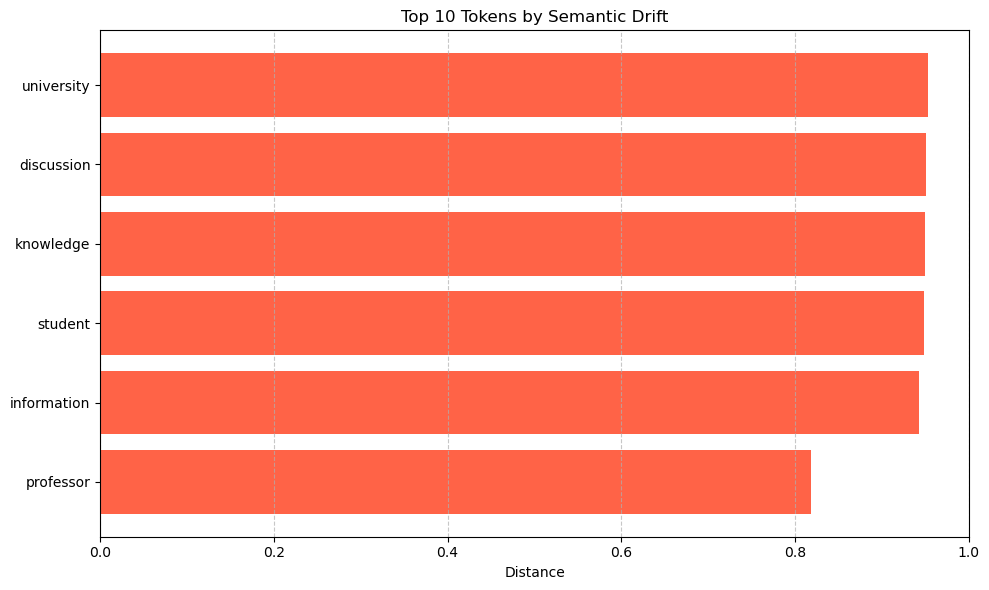

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(distance_df_plot['token'], distance_df_plot['distance'], color='tomato')
plt.xlabel("Distance")
plt.title("Top 10 Tokens by Semantic Drift")
plt.gca().invert_yaxis()  # Most drifted token on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

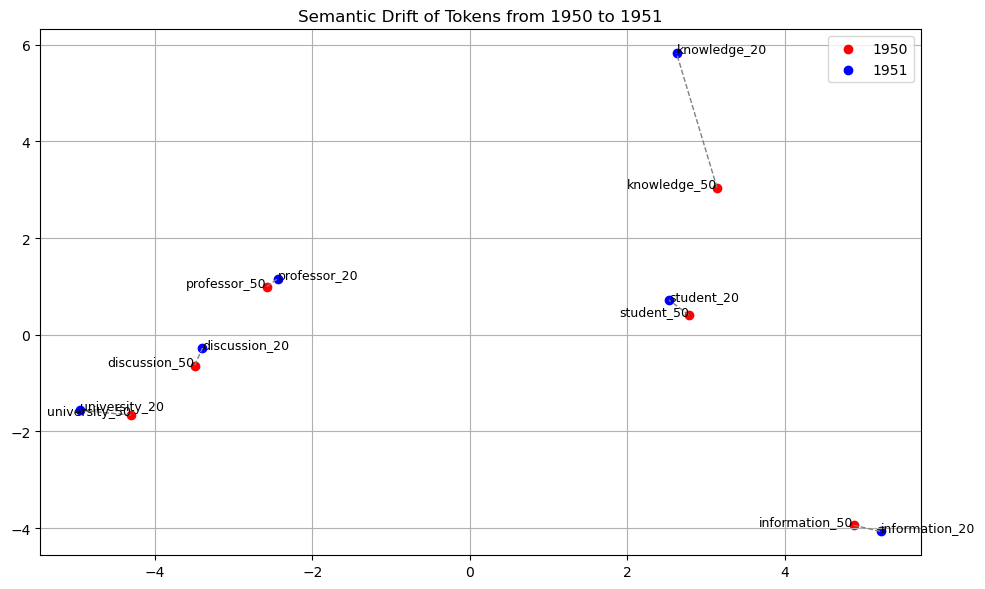

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Select target tokens
list =  ["professor", "university", "discussion", "knowledge", "student", "information"]

# Step 2: Extract embeddings from both DataFrames
embeddings_1950 = df_avg_1950[df_avg_1950['token'].isin(list)]
embeddings_1951 = df_avg_1951[df_avg_1951['token'].isin(list)]


# Step 3: Stack and reduce dimensionality
all_embeddings = pd.concat([embeddings_1950, embeddings_1951])
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_embeddings.iloc[:, 1:].values)

# Step 4: Plot
plt.figure(figsize=(10, 6))

for i, token in enumerate(list):
    x1, y1 = reduced[i]      # 1950
    x2, y2 = reduced[i + len(list)]  # 1951
    plt.scatter(x1, y1, color='red', label='1950' if i == 0 else "")
    plt.scatter(x2, y2, color='blue', label='1951' if i == 0 else "")
    plt.plot([x1, x2], [y1, y2], 'gray', linestyle='--', linewidth=1)
    plt.text(x1, y1, f"{token}_50", fontsize=9, ha='right')
    plt.text(x2, y2, f"{token}_20", fontsize=9, ha='left')

plt.title("Semantic Drift of Tokens from 1950 to 1951")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
